# Homework 1.3

In [ ]:
from heapq import heappush, heappop
from collections import defaultdict
import math


class Graph:
    def __init__(self, undirected=True):
        self.adj = defaultdict(dict)
        self.undirected = undirected

    def add_edge(self, u, v, w):
        self.adj[u][v] = w
        if self.undirected:
            self.adj[v][u] = w

    def neighbors(self, u):
        return self.adj[u].items()


def a_star(G, start, goal, h):               # A* algorithm
    g = defaultdict(lambda: math.inf)        # cost from start to node
    g[start] = 0.0                           # cost from start to start is 0
    prev = {}                           
    pq = []                           
    heappush(pq, (h[start], start))          # priority queue ordered by f = g + h
    seen = set()                             # visited nodes

    while pq:
        _, u = heappop(pq)                   # node with lowest f = g + h
        if u in seen:                        # skip if already visited
            continue
        seen.add(u)                          # mark node as visited
        if u == goal:                        # stop if goal is reached
            break

        for v, w in G.neighbors(u):          # explore neighbors
            alt = g[u] + w                   # tentative cost from start to neighbor
            if alt < g[v]:                   # found a cheaper path to neighbor
                g[v] = alt                   # update cost
                prev[v] = u                  # update predecessor
                heappush(pq, (alt + h[v], v)) # add neighbor to priority queue

    return g, prev

def reconstruct_path(prev, start, goal):       # reconstruct path from start to goal
    if start == goal:                          # trivial case
        return [start]                         # return path with single node
    if goal not in prev:                       # no path found
        return []         
    path = [goal]                              # start from goal
    while path[-1] != start:                   # backtrack to start
        path.append(prev[path[-1]])         # add predecessor to path   
    return list(reversed(path))          # reverse path to get from start to goal

def routing_table(prev, dist, start):         # build routing table from predecessor and distance maps
    table = {}                                              
    for node, d in dist.items():              # for each node and its distance                             
        if d is math.inf:                  # skip unreachable nodes
            continue
        cur = node                           # find next hop
        while cur in prev and prev[cur] != start:          # backtrack to start
            cur = prev[cur]                                # update current node
        table[node] = (d, start if node == start else cur)        # store distance and next hop
    return dict(sorted(table.items()))               # return sorted table


def build_1_graph():             # build graph for first test case
    G = Graph()
    edges = [
        ("A","B",9),
        ("A","C",4),
        ("A","D",7),
        ("B","E",11),
        ("C","E",17),
        ("C","F",12),
        ("D","F",14),
        ("D","C",18),
        ("F","Z",9),
        ("E","Z",5),
    ]
    for u,v,w in edges:
        G.add_edge(u,v,w)

    H = {"A":21, "B":14, "C":18, "D":18, "E":5, "F":8, "Z":0}

    return G, H


def build_2_graph():             # build graph for second test case
    G = Graph()
    edges = [
        ("A","B",5),
        ("A","C",4),
        ("B","C",1),
        ("B","D",5),
        ("C","D",8),
        ("D","E",2),
        ("C","E",10),
        ("D","Z",6),
        ("E","Z",5),
    ]
    for u,v,w in edges:
        G.add_edge(u,v,w)

    H = {"A":11, "B":8, "C":8, "D":4, "E":2, "Z":0}

    return G, H


def run_case(title, build_fn):                    # run a test case
    G, H = build_fn()                             # build graph and heuristic
    dist, prev = a_star(G, "A", "Z", H)           # run A* algorithm
    path = reconstruct_path(prev, "A", "Z")       # reconstruct path from A to Z
    table = routing_table(prev, dist, "A")        # build routing table from A

    print(f"\n{title}")
    print("Shortest path A->Z:", path)
    print("Total cost:", dist["Z"])
    print("Routing table from A:")
    for node, (cost, next_hop) in table.items():
        print(f"  to {node:>2}: cost={int(cost) if cost.is_integer() else cost}, next_hop={next_hop}")

if __name__ == "__main__":
    run_case("HW 1.3 (1 Graph)", build_1_graph)
    run_case("HW 1.3 (2 Graph)", build_2_graph)



--- HW 1.3 (1 graph) ---
Shortest path A->Z: ['A', 'C', 'F', 'Z']
Total cost: 25.0
Routing table from A:
  to  A: cost=0, next_hop=A
  to  B: cost=9, next_hop=B
  to  C: cost=4, next_hop=C
  to  D: cost=7, next_hop=D
  to  E: cost=20, next_hop=B
  to  F: cost=16, next_hop=C
  to  Z: cost=25, next_hop=C

--- HW 1.3 (2 graph) ---
Shortest path A->Z: ['A', 'B', 'D', 'Z']
Total cost: 16.0
Routing table from A:
  to  A: cost=0, next_hop=A
  to  B: cost=5, next_hop=B
  to  C: cost=4, next_hop=C
  to  D: cost=10, next_hop=B
  to  E: cost=12, next_hop=B
  to  Z: cost=16, next_hop=B


# Homework 2.3

In [ ]:
from heapq import heappush, heappop
from collections import defaultdict
import math

class Graph:
    def __init__(self, undirected=True):
        self.adj = defaultdict(dict)
        self.undirected = undirected
    def add_edge(self, u, v, w):
        self.adj[u][v] = w
        if self.undirected:
            self.adj[v][u] = w
    def neighbors(self, u):
        return self.adj[u].items()

def dijkstra(G, start):                                 # Dijkstra's algorithm
    dist = defaultdict(lambda: math.inf)                # distance map
    prev = {}
    dist[start] = 0.0                                   # distance to start is 0
    pq = [(0.0, start)]                                 # priority queue
    seen = set()                                        # visited nodes

    while pq:                                           
        d, u = heappop(pq)                              # node with lowest distance
        if u in seen:                                   # skip if already visited
            continue
        seen.add(u)                                     # mark node as visited
        for v, w in G.neighbors(u):                     # explore neighbors
            alt = d + w
            if alt < dist[v]:                           # found a shorter path to v
                dist[v] = alt                           # update distance
                prev[v] = u                             # update predecessor
                heappush(pq, (alt, v))                  # add neighbor to priority queue
    return dist, prev

def reconstruct_path(prev, start, goal):               # reconstruct path from start to goal
    if start == goal:                                  # trivial case
        return [start]                                 # return path with single node    
    if goal not in prev:                               # no path found
        return []
    path = [goal]                                      # start from goal
    while path[-1] != start:                           # backtrack to start
        path.append(prev[path[-1]])                    # add predecessor to path
    return path[::-1]                                  # reverse path to get from start to goal

def routing_table(prev, dist, start):                  # build routing table from predecessor and distance maps
    table = {}
    for node, d in dist.items():                       # for each node and its distance
        if d is math.inf:                              # skip unreachable nodes
            continue
        cur = node                                     # find next hop
        while cur in prev and prev[cur] != start:      # backtrack to start
            cur = prev[cur]                            # update current node
        table[node] = {"cost": d, "next_hop": (start if node == start else cur)}           # store distance and next hop
    return dict(sorted(table.items()))


def build_1_graph():                       # build graph for first test case
    G = Graph()
    edges = [
        ("A","B",4),
        ("A","C",3),
        ("B","F",5),
        ("B","E",12),
        ("C","D",7),
        ("C","E",10),
        ("D","E",2),
        ("E","Z",5),
        ("F","Z",16),
    ]
    for u, v, w in edges:
        G.add_edge(u, v, w)
    return G

def build_2_graph():                        # build graph for second test case
    G = Graph()
    edges = [
        ("A","B",9),
        ("A","C",4),
        ("A","D",7),
        ("B","E",11),
        ("C","E",17),
        ("C","F",12),
        ("D","F",14),
        ("E","Z",5),
        ("F","Z",9),
    ]
    for u, v, w in edges:
        G.add_edge(u, v, w)
    return G

def run_case(title, build_fn):
    G = build_fn()
    dist, prev = dijkstra(G, "A")
    path = reconstruct_path(prev, "A", "Z")
    print(f"\n{title}")
    print("Shortest path A→Z:", path)
    print("Length:", dist["Z"])
    print("Routing table from A:")
    for node, info in routing_table(prev, dist, "A").items():
        cost = info["cost"]
        print(f"  {node}: cost={int(cost) if cost.is_integer() else cost}, next_hop={info['next_hop']}")

if __name__ == "__main__":
    run_case("HW 2.3 (1 Graph)", build_1_graph)
    run_case("HW 2.3 (2 Graph)", build_2_graph)



HW 2.3 (1 Graph)
Shortest path A→Z: ['A', 'C', 'D', 'E', 'Z']
Length: 17.0
Routing table from A:
  A: cost=0, next_hop=A
  B: cost=4, next_hop=B
  C: cost=3, next_hop=C
  D: cost=10, next_hop=C
  E: cost=12, next_hop=C
  F: cost=9, next_hop=B
  Z: cost=17, next_hop=C

HW 2.3 (2 Graph)
Shortest path A→Z: ['A', 'C', 'F', 'Z']
Length: 25.0
Routing table from A:
  A: cost=0, next_hop=A
  B: cost=9, next_hop=B
  C: cost=4, next_hop=C
  D: cost=7, next_hop=D
  E: cost=20, next_hop=B
  F: cost=16, next_hop=C
  Z: cost=25, next_hop=C


# Homework 3

In [ ]:
from heapq import heappush, heappop
from collections import defaultdict, deque
import math

class Graph:
    def __init__(self, undirected=True):
        self.adj = defaultdict(dict)
        self.undirected = undirected

    def add_edge(self, u, v, w):
        self.adj[u][v] = w
        if self.undirected:
            self.adj[v][u] = w

    def neighbors(self, u):
        return self.adj[u].items()

def reconstruct_path(prev, start, goal):                # reconstruct path from start to goal
    if start == goal:                                    # trivial case
        return [start]                                 # return path with single node
    if goal not in prev:                               # no path found
        return []                                      # return empty path
    path = [goal]                                      # start from goal
    while path[-1] != start:                           # backtrack to start
        path.append(prev[path[-1]])                    # add predecessor to path
    return path[::-1]                                  # reverse path to get from start to goal

def path_cost(G, path):                                # compute total cost of a path
    if not path:                                       
        return math.inf
    total = 0
    for i in range(len(path) - 1):                     # sum edge weights
        total += G.adj[path[i]][path[i+1]]             # add weight of edge to total
    return total

def hop_heuristic_to_Z(G):                             # heuristic: number of hops to Z
    h = defaultdict(lambda: math.inf)
    goal = "Z"
    q = deque([goal])
    h[goal] = 0
    seen = {goal}
    while q:                                            # BFS to compute hops
        u = q.popleft()                                 # dequeue node
        for v, _ in G.neighbors(u):                     # explore neighbors
            if v not in seen:                           # skip if already seen  
                seen.add(v)                             # mark as seen
                h[v] = h[u] + 1                         # update hop count
                q.append(v)                             # enqueue neighbor
    return h

def greedy_best_first(G, start, goal, h):               # Greedy Best-First Search
    prev = {}    
    visited = set()
    pq = [(h[start], start)]                            # priority queue ordered by heuristic

    while pq:                                           # while there are nodes to explore
        _, u = heappop(pq)                              # node with lowest heuristic
        if u in visited:                                # skip if already visited
            continue
        visited.add(u)                                  # mark node as visited
        if u == goal:                                   # stop if goal is reached
            break

        for v, _ in G.neighbors(u):                     # explore neighbors
            if v not in visited:                        # skip if already visited
                if v not in prev:                       # record predecessor
                    prev[v] = u                         
                heappush(pq, (h[v], v))                 # add neighbor to priority queue
    return prev

def dijkstra(G, start):                                 # Dijkstra's algorithm
    dist = defaultdict(lambda: math.inf)        
    prev = {}
    dist[start] = 0.0
    pq = [(0.0, start)]
    seen = set()

    while pq:                                           # while there are nodes to explore
        d, u = heappop(pq)                              # node with lowest distance
        if u in seen:                                   # skip if already visited
            continue
        seen.add(u)                                     # mark node as visited
        for v, w in G.neighbors(u):                     # explore neighbors
            alt = d + w                                  # tentative distance to neighbor
            if alt < dist[v]:                           # found a cheaper path to neighbor
                dist[v] = alt                           # update distance
                prev[v] = u                             # update predecessor
                heappush(pq, (alt, v))                  # add neighbor to priority queue
    return dist, prev

def a_star(G, start, goal, h):                          # A* algorithm
    g = defaultdict(lambda: math.inf)
    prev = {}
    g[start] = 0.0
    pq = [(h[start], start)]      
    seen = set()

    while pq:                                           # while there are nodes to explore
        _, u = heappop(pq)                              # node with lowest f = g + h
        if u in seen:                                   # skip if already visited
            continue
        seen.add(u)                                     # mark node as visited
        if u == goal:
            break
        for v, w in G.neighbors(u):                     # explore neighbors
            alt = g[u] + w                              # tentative cost from start to neighbor
            if alt < g[v]:                              # found a cheaper path to neighbor
                g[v] = alt                               # update cost
                prev[v] = u                             # update predecessor
                heappush(pq, (alt + h[v], v))          # add neighbor to priority queue
    return g, prev

def build_1_graph():                                   # build graph for first test case
    G = Graph()
    edges = [
        ("A","B",4),
        ("A","C",3),
        ("B","F",5),
        ("B","E",12),
        ("C","D",7),
        ("C","E",10),
        ("D","E",2),
        ("E","Z",5),
        ("F","Z",16),
    ]
    for u, v, w in edges:
        G.add_edge(u, v, w)
    return G

def build_2_graph():                                    # build graph for second test case
    G = Graph()
    edges = [
        ("A","B",9),
        ("A","C",4),
        ("A","D",7),
        ("B","E",11),
        ("C","E",17),
        ("C","F",12),
        ("D","F",14),
        ("E","Z",5),
        ("F","Z",9),
    ]
    for u, v, w in edges:
        G.add_edge(u, v, w)
    return G

def run_case(title, build_fn):
    G = build_fn()
    H = hop_heuristic_to_Z(G)  # heuristic for both A* and Greedy

    # Dijkstra
    d_dist, d_prev = dijkstra(G, "A")
    d_path = reconstruct_path(d_prev, "A", "Z")
    d_cost = d_dist["Z"]

    # A*
    a_dist, a_prev = a_star(G, "A", "Z", H)
    a_path = reconstruct_path(a_prev, "A", "Z")
    a_cost = a_dist["Z"]

    # Greedy Best First
    g_prev = greedy_best_first(G, "A", "Z", H)
    g_path = reconstruct_path(g_prev, "A", "Z")
    g_cost = path_cost(G, g_path)

    print(f"\n=== {title} ===")
    print("Dijkstra: path", d_path, "cost", d_cost)
    print("A*      : path", a_path, "cost", a_cost)
    print("Greedy  : path", g_path, "cost", g_cost)

if __name__ == "__main__":
    run_case("HW3 Graph 1 (left)", build_1_graph)
    run_case("HW3 Graph 2 (right)", build_2_graph)



=== HW3 Graph 1 (left) ===
Dijkstra: path ['A', 'C', 'D', 'E', 'Z'] cost 17.0
A*      : path ['A', 'C', 'D', 'E', 'Z'] cost 17.0
Greedy  : path ['A', 'B', 'E', 'Z'] cost 21

=== HW3 Graph 2 (right) ===
Dijkstra: path ['A', 'C', 'F', 'Z'] cost 25.0
A*      : path ['A', 'C', 'F', 'Z'] cost 25.0
Greedy  : path ['A', 'B', 'E', 'Z'] cost 25


# Homework 4

In [ ]:
from collections import defaultdict

class Graph:
    def __init__(self, undirected=True):
        self.adj = defaultdict(dict)
        self.undirected = undirected

    def add_edge(self, u, v, w):
        self.adj[u][v] = w
        if self.undirected:
            self.adj[v][u] = w

    def neighbors(self, u):
        return self.adj[u].items()



def all_paths(G, start, goal):
    result = []

    def dfs(u, path, cost):                                    # depth-first search to find all paths
        if u == goal:
            result.append((path.copy(), cost))
            return

        for v, w in G.neighbors(u):                             # try all neighbors that are not already in the path (avoid cycles)
            if v not in path:           
                path.append(v)
                dfs(v, path, cost + w)  
                path.pop()             

    dfs(start, [start], 0)
    return result



def build_graph_1():
    G = Graph()
    edges = [
        ("A", "B", 4),
        ("A", "C", 3),
        ("B", "F", 5),
        ("B", "E", 12),
        ("C", "D", 7),
        ("C", "E", 10),
        ("D", "E", 2),
        ("E", "Z", 5),
        ("F", "Z", 16),
    ]
    for u, v, w in edges:
        G.add_edge(u, v, w)
    return G


def build_graph_2():
    G = Graph()
    edges = [
        ("A", "B", 9),
        ("A", "C", 4),
        ("A", "D", 7),
        ("B", "E", 11),
        ("C", "E", 17),
        ("C", "F", 12),
        ("D", "F", 14),
        ("E", "Z", 5),
        ("F", "Z", 9),
    ]
    for u, v, w in edges:
        G.add_edge(u, v, w)
    return G



def run_case(title, build_fn):
    print(f"\n{title}")
    G = build_fn()
    paths = all_paths(G, "A", "Z")
    for p, c in paths:
        print("Path:", " -> ".join(p), "  Cost:", c)

if __name__ == "__main__":
    run_case("Homework 4 - Graph 1 ", build_graph_1)
    run_case("Homework 4 - Graph 2 ", build_graph_2)



Homework 4 - Graph 1 
Path: A -> B -> F -> Z   Cost: 25
Path: A -> B -> E -> Z   Cost: 21
Path: A -> C -> D -> E -> B -> F -> Z   Cost: 45
Path: A -> C -> D -> E -> Z   Cost: 17
Path: A -> C -> E -> B -> F -> Z   Cost: 46
Path: A -> C -> E -> Z   Cost: 18

Homework 4 - Graph 2 
Path: A -> B -> E -> C -> F -> Z   Cost: 58
Path: A -> B -> E -> Z   Cost: 25
Path: A -> C -> E -> Z   Cost: 26
Path: A -> C -> F -> Z   Cost: 25
Path: A -> D -> F -> C -> E -> Z   Cost: 55
Path: A -> D -> F -> Z   Cost: 30


# Homework 5


=== EASY ===
Puzzle 1: solved=True, time=0.0008 s
Puzzle 2: solved=True, time=0.0227 s
Puzzle 3: solved=True, time=0.0004 s
Average time for easy: 0.0080 s

=== MEDIUM ===
Puzzle 1: solved=True, time=0.0004 s
Puzzle 2: solved=True, time=0.0090 s
Average time for medium: 0.0047 s

=== HARD ===
Puzzle 1: solved=False, time=0.0184 s
Puzzle 2: solved=True, time=0.0165 s
Average time for hard: 0.0174 s

=== EXPERT ===
Puzzle 1: solved=True, time=0.0690 s
Puzzle 2: solved=False, time=0.1879 s
Puzzle 3: solved=True, time=0.0699 s
Average time for expert: 0.1089 s


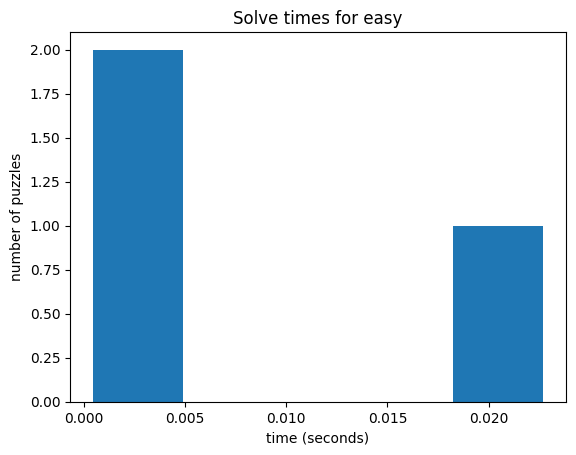

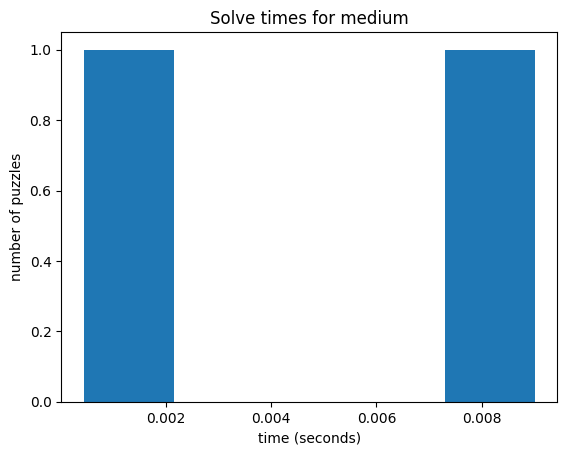

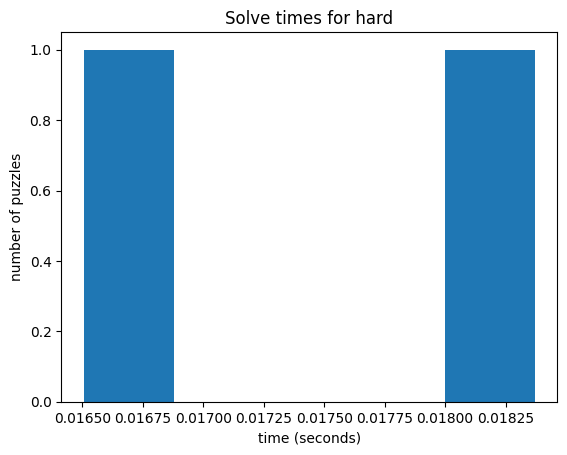

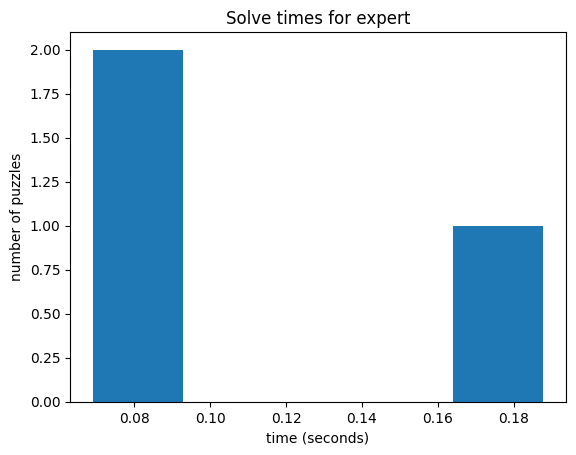

In [ ]:
import time
import matplotlib.pyplot as plt


def print_board(board):                             # print Sudoku board
    for r in range(9):
        row = ""
        for c in range(9):
            row += str(board[r][c]) + " "
            if c % 3 == 2 and c != 8:
                row += "| "
        print(row)
        if r % 3 == 2 and r != 8:
            print("-" * 21)
    print()


def find_empty(board):                               # find an empty cell (0)
    for r in range(9):
        for c in range(9):
            if board[r][c] == 0:
                return r, c
    return None

 
def valid(board, row, col, num):                     # check if num can be placed at board[row][col]
    for c in range(9):                               # check row
        if board[row][c] == num:
            return False
    for r in range(9):                               # check column
        if board[r][col] == num:                     
            return False
    box_r = (row // 3) * 3                          
    box_c = (col // 3) * 3
    for r in range(box_r, box_r + 3):
        for c in range(box_c, box_c + 3):
            if board[r][c] == num:
                return False
    return True


def solve(board):                                    # backtracking Sudoku solver
    empty = find_empty(board)
    if not empty:
        return True  
    r, c = empty

    for num in range(1, 10):                         # try numbers 1-9     
        if valid(board, r, c, num):                  # check if valid
            board[r][c] = num                        
            if solve(board):                        
                return True
            board[r][c] = 0        

    return False



def copy_board(board):
    return [row[:] for row in board]


def solve_and_time(board):
    b = copy_board(board)
    start = time.perf_counter()
    solved = solve(b)
    end = time.perf_counter()
    elapsed = end - start
    return solved, elapsed, b


def run_experiments(difficulty_name, boards):
    print(f"\n=== {difficulty_name.upper()} ===")
    times = []
    for i, board in enumerate(boards, start=1):
        solved, t, solved_board = solve_and_time(board)
        times.append(t)
        print(f"Puzzle {i}: solved={solved}, time={t:.4f} s")
    avg = sum(times) / len(times)
    print(f"Average time for {difficulty_name}: {avg:.4f} s")
    return times


def plot_histograms(results):
    for diff, times in results.items():
        plt.figure()
        plt.hist(times, bins=5)
        plt.title(f"Solve times for {diff}")
        plt.xlabel("time (seconds)")
        plt.ylabel("number of puzzles")
    plt.show()

easy_boards = [
    [
        [2,0,0, 0,1,0, 9,4,0],
        [5,3,0, 0,0,0, 6,7,0],
        [0,0,0, 0,5,6, 8,0,1],

        [0,0,5, 0,0,1, 0,9,0],
        [8,9,0, 4,0,3, 0,1,7],
        [0,6,0, 7,0,0, 2,0,0],

        [7,0,4, 6,3,0, 0,0,0],
        [0,2,8, 0,0,0, 0,5,3],
        [0,1,9, 0,4,0, 0,0,8],
    ],
    [
        [5,3,0, 0,7,0, 0,0,0],
        [6,0,0, 1,9,5, 0,0,0],
        [0,9,8, 0,0,0, 0,6,0],

        [8,0,0, 0,6,0, 0,0,3],
        [4,0,0, 8,0,3, 0,0,1],
        [7,0,0, 0,2,0, 0,0,6],

        [0,6,0, 0,0,0, 2,8,0],
        [0,0,0, 4,1,9, 0,0,5],
        [0,0,0, 0,8,0, 0,7,9],
    ],
    [
        [2,0,0, 0,1,0, 9,4,0],
        [5,3,0, 0,0,0, 6,7,0],
        [0,0,0, 0,5,6, 8,0,1],

        [0,0,5, 0,0,1, 0,9,0],
        [8,9,0, 4,0,3, 0,1,7],
        [0,6,0, 7,0,0, 2,0,0],

        [7,0,4, 6,3,0, 0,0,0],
        [0,2,8, 0,0,0, 0,5,3],
        [0,1,9, 0,4,0, 0,0,8],
    ],
]

medium_boards = [
    [
        [0,0,8, 4,0,3, 1,0,0],
        [6,0,9, 0,0,0, 7,0,8],
        [4,0,0, 0,0,0, 0,0,9],
        
        [0,4,0, 2,5,6, 0,9,0],
        [0,0,0, 0,0,0, 0,0,0],
        [0,5,0, 7,1,8, 0,3,0],

        [5,0,0, 0,0,0, 0,0,7],
        [1,0,6, 0,0,0, 9,0,3],
        [0,0,3, 9,0,2, 4,0,0],
    ],
    [
        [0,0,3, 0,0,5, 0,0,6],
        [0,0,1, 0,7,0, 2,9,3],
        [0,0,2, 0,3,8, 0,0,0],
        
        [0,0,8, 0,0,2, 9,0,7],
        [1,7,0, 0,8,3, 6,0,0],
        [2,0,6, 0,4,0, 5,0,1],

        [0,0,0, 7,0,0, 0,5,2],
        [0,2,7, 0,0,9, 0,0,0],
        [0,0,0, 0,0,0, 0,0,0],
    ],
]

hard_boards = [
    [
        [0,8,0, 0,4,0, 3,0,0],
        [6,1,0, 0,0,0, 0,7,0],
        [3,0,8, 0,0,5, 0,0,0],
        
        [0,0,7, 0,3,0, 1,0,0],
        [0,0,0, 5,0,2, 0,0,0],
        [0,0,9, 0,6,0, 2,0,0],

        [0,0,0, 2,0,0, 0,0,5],
        [0,4,0, 0,0,0, 0,6,1],
        [0,0,3, 0,7,0, 0,8,0],
    ],
    [
        [6,0,0, 0,0,0, 0,7,0],
        [0,0,0, 0,3,0, 9,0,4],
        [0,0,1, 7,0,0, 0,3,6],
        
        [0,0,7, 0,0,0, 0,1,0],
        [0,0,6, 4,0,3, 7,0,2],
        [0,5,0, 0,0,0, 0,0,0],

        [0,0,0, 0,8,0, 2,0,1],
        [4,0,0, 1,6,0, 0,0,0],
        [3,0,0, 9,0,0, 0,0,8],
    ],
]

expert_boards = [
    [
        [0,0,0, 0,0,0, 8,9,0],
        [0,0,3, 2,1,0, 0,0,0],
        [4,1,8, 0,0,0, 0,0,0],
        
        [2,0,0, 5,6,0, 0,0,0],
        [8,9,0, 0,0,0, 0,0,4],
        [0,0,5, 0,0,7, 0,0,6],

        [0,0,2, 4,0,0, 0,0,0],
        [3,0,0, 0,0,0, 0,1,0],
        [0,0,0, 0,7,0, 6,0,0],
    ],
    [
        [3,0,0, 0,0,2, 8,0,0],
        [0,4,8, 0,0,0, 0,0,0],
        [0,1,0, 0,0,6, 0,0,9],
        
        [0,0,0, 9,0,8, 2,0,0],
        [8,0,0, 0,0,0, 0,0,1],
        [0,0,6, 7,0,4, 0,0,8],

        [5,0,0, 1,0,0, 0,3,0],
        [5,0,0, 0,0,0, 0,8,0],
        [0,0,9, 8,0,0, 0,0,7],
    ],
    [
        [0,0,0, 0,0,0, 0,0,7],
        [8,0,6, 0,0,0, 5,0,0],
        [5,2,0, 0,0,8, 0,0,0],
        
        [0,0,0, 0,4,1, 6,8,0],
        [0,0,2, 8,0,0, 0,0,0],
        [0,4,0, 6,0,0, 3,2,0],

        [1,0,0, 0,0,3, 0,7,0],
        [0,8,0, 0,0,0, 0,0,0],
        [0,0,7, 0,9,6, 0,0,0],
    ],
]


if __name__ == "__main__":
    results = {}
    if easy_boards:
        results["easy"] = run_experiments("easy", easy_boards)
    if medium_boards:
        results["medium"] = run_experiments("medium", medium_boards)
    if hard_boards:
        results["hard"] = run_experiments("hard", hard_boards)
    if expert_boards:
        results["expert"] = run_experiments("expert", expert_boards)

    if results:
        plot_histograms(results)
